# Lab 7

Registration No.: 2348542

Name: Purusharth Malik

## Importing the libraries and Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('crest')

In [2]:
df = pd.read_csv('employee_data (1) 2.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [3]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [4]:
df.shape

(14249, 10)

In [5]:
df.isna().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [6]:
#replacing the null values with 0
df.fillna({'filed_complaint':0, 'recently_promoted':0}, inplace=True)
df.filed_complaint.unique(), df.recently_promoted.unique()

(array([0., 1.]), array([0., 1.]))

In [7]:
#we will remove the people who have not been evaluated from the dataset
df.dropna(subset=['last_evaluation', 'department'], inplace=True)

In [8]:
df.isna().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

## Visualizations

### Histogram

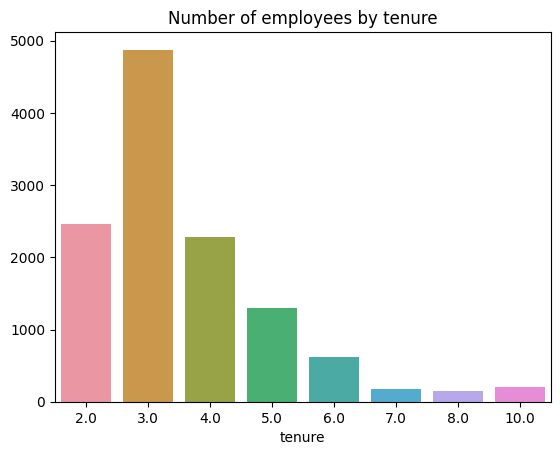

In [9]:
df_count = df.tenure.value_counts()
sns.barplot(x=df_count.index, y=df_count.values)
plt.title('Number of employees by tenure')
plt.show()

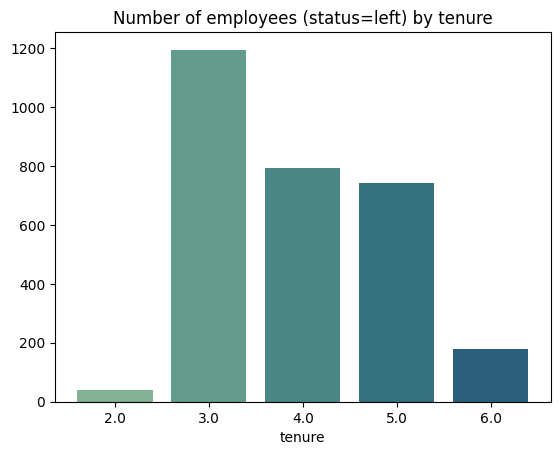

In [10]:
left = df[df.status=='Left']
left_count = left.tenure.value_counts()
sns.barplot(x=left_count.index, y=left_count.values)
plt.title('Number of employees (status=left) by tenure')
sns.histplot()
plt.show()

<b><u>Trend</u></b>

Within the first 2 years, hardly anyone leaves the company. By the third year, employees start to figure out if this is working for them or not. After that, the longer an employee stays in the company, higher are their chances of staying with the company.

### Boxplot

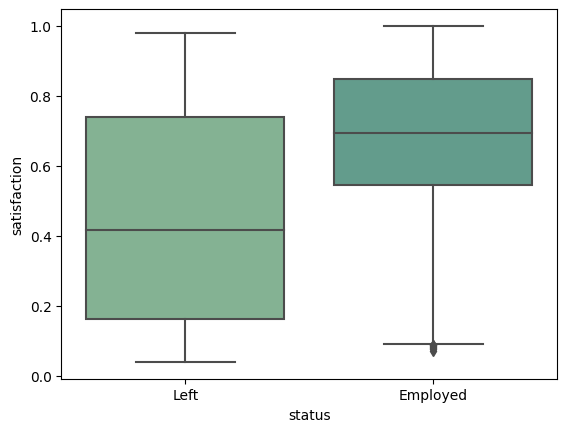

In [11]:
sns.boxplot(data=df, x='status', y='satisfaction')
plt.show()

Clearly, people who are still employed at the company have, on average, higher satisfaction level than the people who left.

### Pie Chart

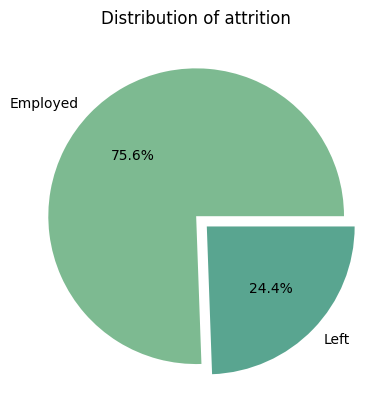

In [12]:
plt.pie(df.status.value_counts().values,
        labels=df.status.value_counts().index,
        explode=[0, 0.1],
        autopct='%0.01f%%'
        )
plt.title('Distribution of attrition')
plt.show()

### Scatter Plot

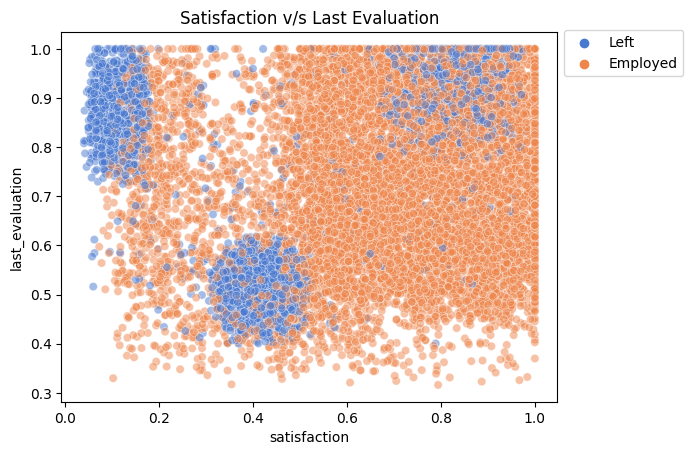

In [13]:
sns.set_palette('muted')
sns.scatterplot(data=df, 
                x='satisfaction', 
                y='last_evaluation',
                hue='status',
                alpha=0.5)
plt.legend(bbox_to_anchor=(1, 1.025))
plt.title('Satisfaction v/s Last Evaluation')
plt.show()

There are 3 major clusters of people who have left the company.

1. People who were evaluated long ago and are unsatisfied.

2. People who were recently evaluated and are unsatified.

3. People who were recently evaluated and are highly satisfied.

Most of the people come under the first and second category. The reason behind the 3rd type of people leaving the company might be that they feel like they are now very comfortable in the company and would like to switch things up a little bit.

In [14]:
df[df.status=='Left'][['satisfaction', 'last_evaluation']].corr()

,satisfaction,last_evaluation
satisfaction,1.000000,0.177681
last_evaluation,0.177681,1.000000


It was very evident from the scatter plot but here have quantified the fact that the two variables are not correlated with eachother for people who have left the company.

## Decision Tree Modeling with Tree Pruning and Split Criteria

### Build a decision tree

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric = df[df.dtypes[df.dtypes!=object].index]

In [16]:
X, y = numeric.values, le.fit_transform(df['status'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=42)

In [18]:
#decision tree with gini impurity
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'F1-score: {f1_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

F1-score: 0.9279050042408822


array([[1783,   42],
       [  43,  547]], dtype=int64)

In [19]:
#decision tree with entropy
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'F1-score: {f1_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

F1-score: 0.9309462915601023


array([[1788,   37],
       [  44,  546]], dtype=int64)

In this particular case, entropy gives a relatively better model than gini impurity.

### Visualizing the tree structure

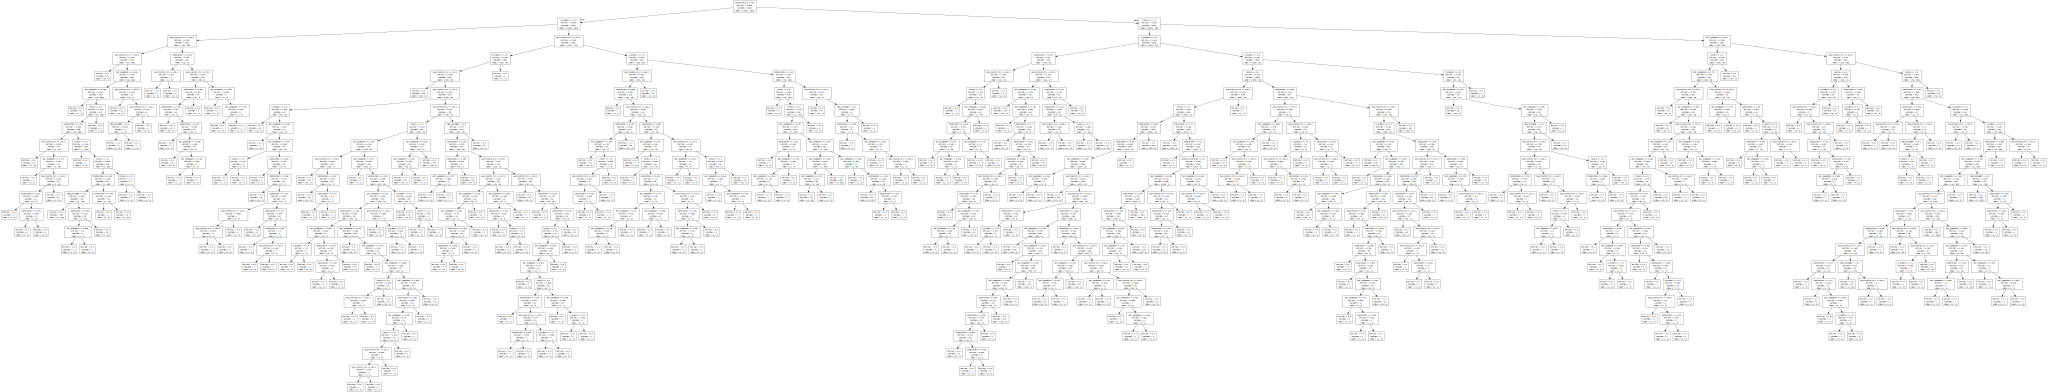

In [20]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source

graph = Source(export_graphviz(dt, out_file=None, feature_names=numeric.columns))
SVG(graph.pipe(format='svg'))

In [21]:
#depth of the tree
print(f'The depth of the tree is: {dt.get_depth()}')

The depth of the tree is: 22


In [22]:
#looking at feature importances
feature_imp = dict(zip(numeric.columns, dt.feature_importances_))
feature_imp

{'avg_monthly_hrs': 0.2322471049670448,
 'filed_complaint': 0.0037372590870357603,
 'last_evaluation': 0.1365810839229891,
 'n_projects': 0.14988122020815564,
 'recently_promoted': 0.0006071343028071477,
 'satisfaction': 0.2716534963322522,
 'tenure': 0.20529270117971538}

Thus the most important features(in order) are:
```
1. satisfaction
2. avg_monthly_hrs
3. tenure
```

We can also see that in the tree, the first split happens on `satisfaction`.

In [23]:
dt.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.00000000e+00, 1.42592521e-04, 1.42916130e-04, 1.55279503e-04,
        1.64205972e-04, 2.07039337e-04, 2.07039337e-04, 2.07039337e-04,
        2.07039337e-04, 2.07039337e-04, 2.07039337e-04, 2.07039337e-04,
        2.07039337e-04, 2.07039337e-04, 2.07039337e-04, 2.14374195e-04,
        2.34437112e-04, 2.34437112e-04, 2.43117551e-04, 2.50231204e-04,
        2.51281210e-04, 2.51281210e-04, 2.51489541e-04, 2.57029100e-04,
        2.59826317e-04, 2.68746377e-04, 2.71592485e-04, 2.74347310e-04,
        2.76052450e-04, 2.85185042e-04, 2.85185042e-04, 2.85185042e-04,
        2.85185042e-04, 2.85185042e-04, 2.85185042e-04, 2.85185042e-04,
        2.85185042e-04, 2.85185042e-04, 2.85185042e-04, 2.85185042e-04,
        2.85185042e-04, 2.85185042e-04, 2.93423070e-04, 2.97244053e-04,
        3.00297399e-04, 3.00722489e-04, 3.07018862e-04, 3.08135368e-04,
        3.12724844e-04, 3.18969619e-04, 3.20871646e-04, 3.20890326e-04,
        3.23592430e-04, 3.24819412e-04, 3.27394876